# ARIMA

## AR(p)
AR(p) - Autoregression là quá trình tự hồi quy tại độ trễ p. Quan sát tại thời điểm hiện tại được ước lượng dựa trên p quan sát trong quá khứ:
$$y_t = c + \phi_1 y_{t−1} + \phi_2 y_{t−2}+ \dots + \phi_p y_{t−p}+\epsilon_t$$

- Hệ số tự tương quan riêng phần: thể hiện tương quan giữa yt hiện tại và y tại các độ trễ, bỏ qua tương quan của các quan sát đó với quan sát tại các độ trễ khác.

    VD: giá thịt hôm qua có tương quan với giá thịt hôm nay nhưng giá hôm kia cũng có tương quan với giá hôm qua và hôm nay
    
    => PACF đo tương quan giữa giá hôm qua và hôm nay nhưng loại bỏ mối quan hệ với giá hôm kia\
    => **PACF is real correlations between time spots** chính vì vậy nta sử dụng PACF để ước lượng độ trễ với quá trình AR(p).
    

- p được xác định dựa vào đồ thị PACF: Hệ số tự tương quan riêng phần của quá trình AR(p) sẽ bằng 0 với mọi độ trễ lớn hơn p (thường p = 1)

## MA(q)
MA(q) - Moving average model là 1 hàm tuyến tính ước lượng quan sát hiện tại dựa trên các nhiễu trắng tại q độ trễ (khác với trung bình trượt để làm trơn chuỗi dữ liệu). 

$$y_t = c+ \epsilon_t+\theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}+ \dots +\theta_q\epsilon_{t-q}$$

- Hệ số tự tương quan: thể hiện tương quan giữa chuỗi yt hiện tại và chuỗi yt tại các độ trễ. 

    VD: r1 thể hiện tương quan giữa yt và y(t-1), r2 thể hiện tương quan giữa yt và y(t-2),... các điểm r1,2,.. tạo thành đồ thị ACF. Đồ thị ACF thể hiện được cả xu thế và mùa vụ của chuỗi tgian 
    
- q được xác định dựa vào đồ thị ACF: tại độ trễ q thì ACF significant (vượt qua khoảng tin cậy) sau đó giảm về 0 (tương tự như PACF)
    

## I(d)
I(d) - sai phân bậc d của chuỗi thời gian. Nếu chuỗi dừng ở chuỗi gốc => d=0, dừng ở sai phân bậc 1 => d=1

Quá trình dừng là khi tại mọi thời điểm của chuỗi tgian thì các giá trị trung bình, phương sai, hiệp phương sai ko đổi.
Một chuỗi tgian có xu thế là không dừng nhưng nếu không có xu thế vẫn không dừng thì chuỗi tgian tuân theo quy luật bước ngẫu nhiên (random walk) 

## Seasonal - Yếu tố mùa vụ trong ARIMA 

Mô hình SARIMA có dạng: ARIMA (p,d,q) x (P,D,Q)m
 - (p,d,q) -> non - seasonal part
 - (P,D,Q)m -> seasonal - part
 
Cách xác định P,D,Q cơ bản giống với p,d,q nhưng có backshift do ảnh hưởng của mùa vụ.
VD: ARIMA(0,0,0)x(0,0,1)12 sẽ có đồ thị ACF đạt đỉnh ở độ trễ 12 và bằng 0 với các độ trễ khác.

## ARIMA equation 

Kết hợp các quá trình AR, MA, ta có mô hình ARIMA:
$$y′_t = c + \phi_1 y′_{t−1}+\dots+\phi_p y′_{t−p}+\theta_1 \epsilon_{t-1}+\dots+\theta_q \epsilon_{t−q}+\epsilon_t$$

Sau khi xác định đc các độ trễ p,q,d, mô hình ARIMA ước lượng các tham số dựa trên ước lượng hợp lí cực đại (maximum likelihood estimation). Nghĩa là chọn tham số sao cho phương sai của sai số là bé nhất. Tuy nhiên việc này có thể dẫn đến thêm quá nhiều tham số vào mô hình (gây ra overfit) nên cta sử dụng tiêu chuẩn AIC: 
$$AIC=−2log(L)+2(p+q+k+1)$$

**Questions**

1. Tuy kiểm định adf cho thấy chuỗi export_value dừng ở chuỗi gốc nhưng đồ thị ACF cho thấy chuỗi dừng ở sai phân bậc 1 ???

Do kiểm định adf trong r hay python được mặc định có hệ số chặn (constant) nên kết quả kiểm định là chuỗi dừng, cần chỉnh về ko có hệ số chặn và ko có xu thế để có kết quả đúng nhất. 

Phương trình kiểm định adf:
- No constant, no trend:
- Constant, no trend:
- Constant, trend:

2. Không thấy có phương trình của mô hình sarima
3. Dữ liệu của MP theo ngày thì lấy periods bằng bao nhiêu? 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa import tsatools, stattools
import statsmodels.formula.api as sm
import pmdarima as pm
plt.style.use('seaborn-whitegrid')

# Quantity purchase prediction

In [2]:
suvo_quantity = pd.read_excel('MPHG_suvo_quantity.xlsx')
suvo_quantity.head()

,std_factory,std_type,std_size,std_quantity_kg,std_active_date,dt_year,dt_quarter,dt_month,dt_week,dt_quarter_int,dt_month_int
0,Hậu Giang,Sú Vỏ,8/12.3,379.49,2019-10-28,2019,2019/3,2019/10,2019/10/43,3,10
1,Hậu Giang,Sú Vỏ,8/12.3,669.51,2019-10-29,2019,2019/3,2019/10,2019/10/43,3,10
2,Hậu Giang,Sú Vỏ,8/12.3,337.17,2019-10-30,2019,2019/3,2019/10,2019/10/43,3,10
3,Hậu Giang,Sú Vỏ,8/12.3,603.74,2019-10-31,2019,2019/3,2019/10,2019/10/43,3,10
4,Hậu Giang,Sú Vỏ,8/12.3,189.82,2019-11-01,2019,2019/3,2019/11,2019/11/43,3,11


In [3]:
quantity = suvo_quantity[['std_quantity_kg','std_active_date']]
quantity.columns = ['quantity','date']

In [4]:
quantity.head()

,quantity,date
0,379.49,2019-10-28
1,669.51,2019-10-29
2,337.17,2019-10-30
3,603.74,2019-10-31
4,189.82,2019-11-01


In [5]:
date = pd.DataFrame(pd.date_range('2019-10-28', '2020-07-02'))
date.columns=['date']

In [6]:
quantity = quantity.merge(date, how='right').sort_values(by=['date'])

In [7]:
quantity['quantity'] = quantity['quantity'].fillna(0)

In [8]:
quantity = quantity.set_index('date')

<Figure size 720x720 with 0 Axes>

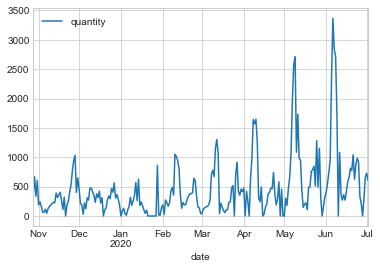

In [9]:
plt.figure(figsize=(10,10))
quantity.plot()
plt.show()

<Figure size 1440x1440 with 0 Axes>

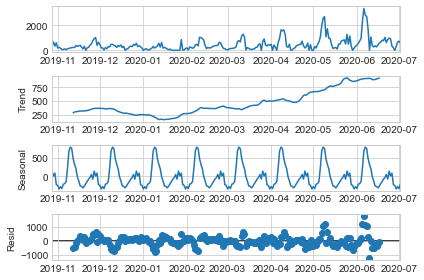

In [11]:
add_model = seasonal_decompose(quantity,model='additive',period=30)
plt.figure(figsize=(20,20))
add_model.plot()
plt.show()

In [11]:
stationary1 = adfuller(quantity, regression='nc')
print(f'ADF Statistic: {stationary1[0]}')
print(f'p-value: {stationary1[1]}')

ADF Statistic: -1.3734851055507935
p-value: 0.15759354748986693


In [12]:
quan_dif = quantity.diff().dropna()

In [13]:
stationary1 = adfuller(quan_dif, regression='nc')
print(f'ADF Statistic: {stationary1[0]}')
print(f'p-value: {stationary1[1]}')

ADF Statistic: -8.434541493283255
p-value: 3.338718146564034e-14


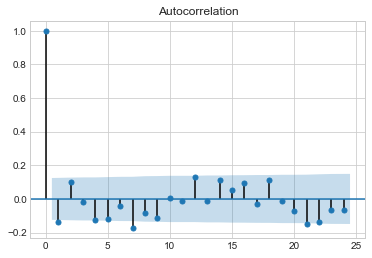

In [14]:
plot_acf(quan_dif)
plt.show()

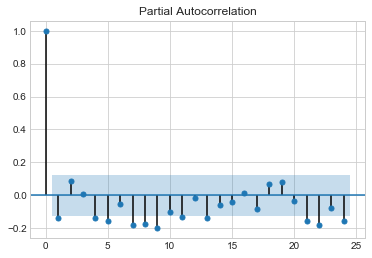

In [15]:
plot_pacf(quan_dif)
plt.show()

**Choose: ARIMA(0,1,0)x(0,1,1)30**

In [16]:
train, test = quantity.iloc[:200], quantity.iloc[200:]

In [17]:
model_sarima1 = SARIMAX(train, order=(0,1,0), seasonal_order=(0,1,1,30), trend='t').fit()
print(model_sarima1.summary())

C:\Users\Linh_Pham\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Linh_Pham\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                             quantity   No. Observations:                  200
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 30)   Log Likelihood               -1224.142
Date:                              Tue, 21 Jul 2020   AIC                           2454.284
Time:                                      15:27:05   BIC                           2463.673
Sample:                                  10-28-2019   HQIC                          2458.094
                                       - 05-14-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0062      0.105     -0.059      0.953      -0.213       0.201
ma.S.L30      -0.59

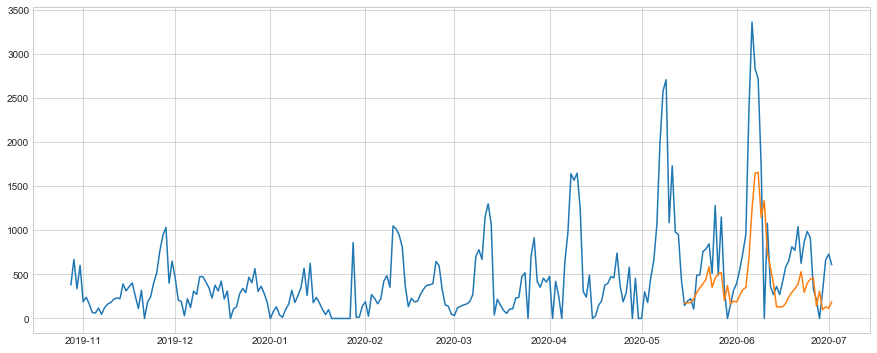

In [18]:
fitted = model_sarima1.forecast(49)
fitted_series = fitted

plt.figure(figsize=(15,6))
plt.plot(quantity)
plt.plot(fitted_series)

In [19]:
model_sarima2 = pm.auto_arima(
    train, start_p=0, start_q=0,
    test='adf',
    max_p=3, max_q=3, m=30,
    start_P=0, start_Q=1,seasonal=True,
    d=1, D=1, trace=True,
    error_action='ignore',
    suppress_warnings=True, 
    stepwise=True
)

model_sarima2.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,1,1,30) [intercept=True]; AIC=2454.283, BIC=2463.672, Time=5.535 seconds
Fit ARIMA(0,1,0)x(0,1,0,30) [intercept=True]; AIC=2477.307, BIC=2483.567, Time=0.135 seconds
Fit ARIMA(1,1,0)x(1,1,0,30) [intercept=True]; AIC=2442.458, BIC=2454.978, Time=4.651 seconds
Fit ARIMA(0,1,1)x(0,1,1,30) [intercept=True]; AIC=2424.861, BIC=2437.381, Time=7.745 seconds
Fit ARIMA(0,1,0)x(0,1,0,30) [intercept=False]; AIC=2475.325, BIC=2478.455, Time=0.121 seconds
Fit ARIMA(0,1,1)x(0,1,0,30) [intercept=True]; AIC=2431.277, BIC=2440.667, Time=1.041 seconds
Fit ARIMA(0,1,1)x(1,1,1,30) [intercept=True]; AIC=2425.635, BIC=2441.285, Time=8.506 seconds
Fit ARIMA(0,1,1)x(0,1,2,30) [intercept=True]; AIC=2425.271, BIC=2440.920, Time=33.380 seconds
Fit ARIMA(0,1,1)x(1,1,0,30) [intercept=True]; AIC=2427.178, BIC=2439.697, Time=5.836 seconds
Fit ARIMA(0,1,1)x(1,1,2,30) [intercept=True]; AIC=2427.265, BIC=2446.044, Time=42.779 seconds
Fit ARIMA(1,1,1)x(0,1,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  200
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 30)   Log Likelihood               -1200.427
Date:                              Tue, 21 Jul 2020   AIC                           2412.855
Time:                                      15:32:17   BIC                           2431.634
Sample:                                           0   HQIC                          2420.476
                                              - 200                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4932      0.338      1.459      0.145      -0.169       1.156
ar.L1          0.6679      0.098      6.816      0.000       0.476       0.860
ma.L1         -1.2598      0.182     -6.925      0.000      -1.616      -0.903
ma.L2          0.2598      0.141      1.841      0.066      -0.017       0.536
ma.S.L30      -0.3979      0.091     -4.349      0.000      -0.577      -0.219
sigma2      8.225e+04   2.67e-06   3.08e+10      0.000    8.23e+04    8.23e+04
===================================================================================
Ljung-Box (Q):                       38.81   Jarque-Bera (JB):                57.74
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               4.72   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.27e+26. Standard errors may be unstable.
"""

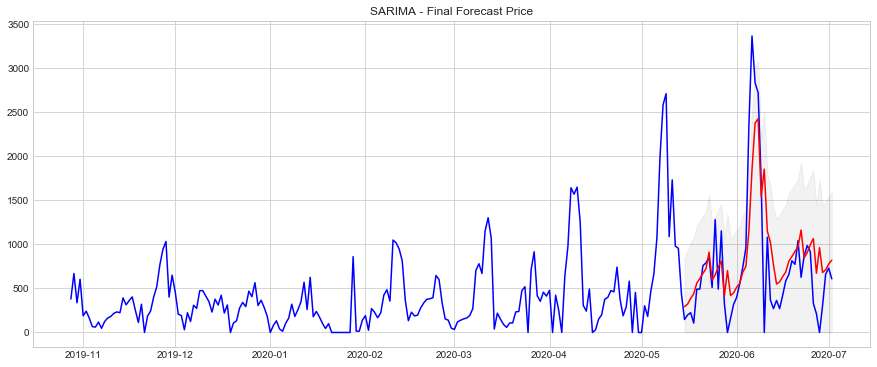

In [20]:
n_periods = 49
fitted, confint = model_sarima2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig,ax=plt.subplots(figsize=(15,6))

plt.plot(quantity,color='blue')
plt.plot(fitted_series, color='red')
plt.fill_between(upper_series.index, 
                 upper_series, 
                 color='k', alpha=0.05)

plt.title("SARIMA - Final Forecast Price")

plt.show()

In [21]:
def _measure_metric(y, yhat):
    e = y-yhat
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape=np.abs(np.mean(e/y))
    return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test.values[0], fitted)
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

Mean Square Error: 709395.4409333727
Root Mean Square Error: 842.2561611133353
Mean Absolute Error: 709.0652116831478
Mean Absolute Percentage Error: 4.811788895786833


# Cost price prediction

## Using seasonal trend and ARMA on residual

In [22]:
cost_price = pd.read_excel('MPHG_suvo_quantity.xlsx', sheet_name='cost_price')
cost_price.head()

,std_commodity,std_incoterms,std_size,std_value_usd_lb,std_value_usd_kg,std_active_date
0,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-08
1,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-09
2,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-10
3,BT CPTO,FOB HCM,8/12,13.75,30.31,2018-06-12
4,BT CPTO,FOB HCM,8/12,13.68,30.16,2018-06-14


In [23]:
cost_price= cost_price[['std_active_date','std_value_usd_kg']]
cost_price.columns = ['date','price'] 

In [24]:
cost_price = cost_price[cost_price['date'] > '2018-12-31']

In [25]:
date = pd.DataFrame(pd.date_range('2019-01-02', '2020-07-03'))
date.columns=['date']

In [26]:
price = cost_price.merge(date, how='right').sort_values(by=['date'])
price.head()

,date,price
0,2019-01-02,30.71
300,2019-01-03,NaN
301,2019-01-04,NaN
1,2019-01-05,30.56
2,2019-01-06,30.40


In [27]:
price['price'] = price['price'].fillna(method='bfill')

In [28]:
price = price.set_index('date')

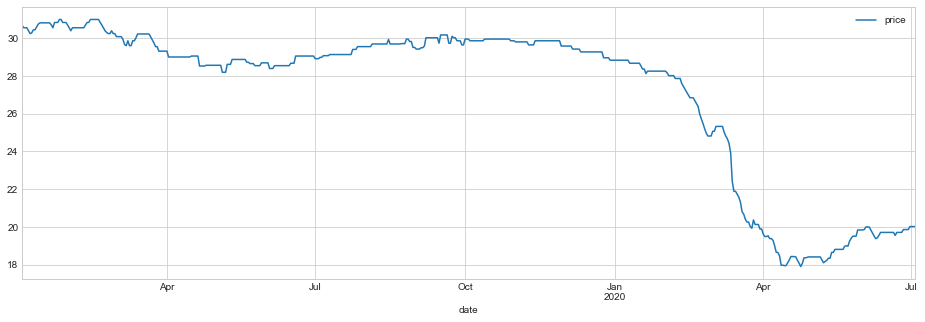

In [29]:
price.plot(figsize=(16,5))

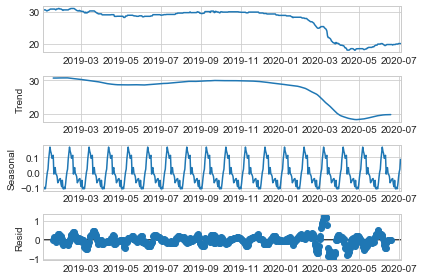

In [30]:
add_model = seasonal_decompose(price,model='additive',period=30)
add_model.plot()
plt.show()

In [31]:
train, test = price.iloc[:400], price.iloc[400:]

### Seasonal + Trend 

**Seasonal, trend for price**

In [32]:
s_price = tsatools.add_trend(price, trend='ctt')
s_price['Day'] = s_price.index.day
s_price.head()

C:\Users\Linh_Pham\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,price,const,trend,trend_squared,Day
date,,,,,
2019-01-02,30.71,1.0,1.0,1.0,2
2019-01-03,30.56,1.0,2.0,4.0,3
2019-01-04,30.56,1.0,3.0,9.0,4
2019-01-05,30.56,1.0,4.0,16.0,5
2019-01-06,30.40,1.0,5.0,25.0,6


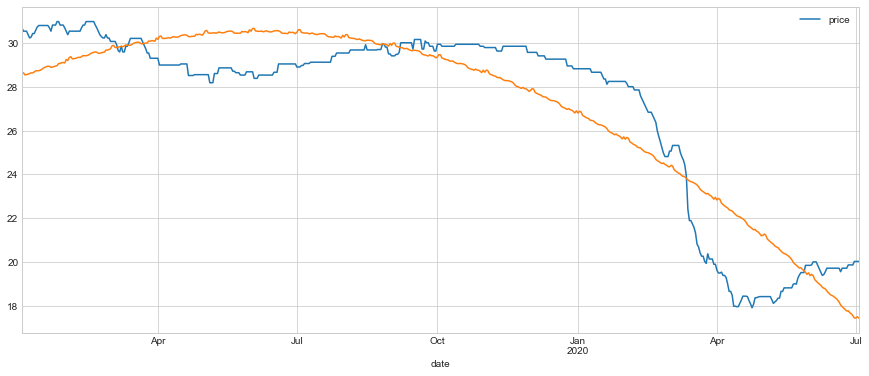

In [33]:
price_st = sm.ols(formula='price ~ trend + np.square(trend) + C(Day)',data=s_price).fit()
price.plot(figsize=(15,6))

trend_price = price_st.predict(s_price)
trend_price.plot()
plt.show()

In [34]:
trend_train = trend_price.iloc[:400]
trend_test = trend_price.iloc[400:]

**Seasonal, trend for train**

In [37]:
s_train = tsatools.add_trend(train, trend='ctt')
s_train['Day'] = s_train.index.day
s_train.head()

,price,const,trend,trend_squared,Day
date,,,,,
2019-01-02,30.71,1.0,1.0,1.0,2
2019-01-03,30.56,1.0,2.0,4.0,3
2019-01-04,30.56,1.0,3.0,9.0,4
2019-01-05,30.56,1.0,4.0,16.0,5
2019-01-06,30.40,1.0,5.0,25.0,6


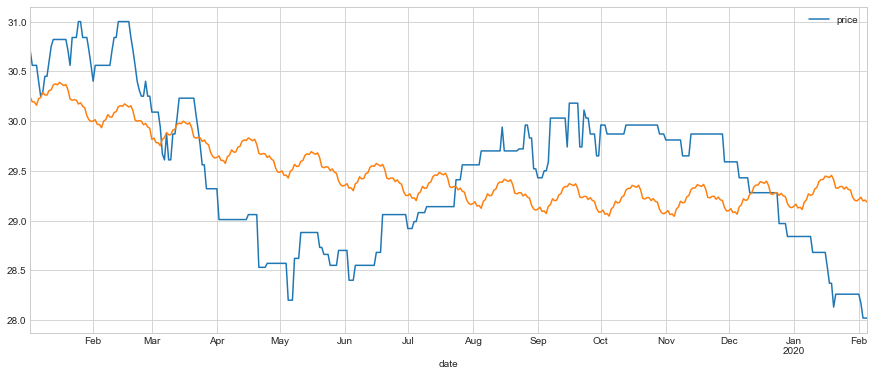

In [38]:
train_st = sm.ols(formula='price ~ trend + np.square(trend) + C(Day)',data=s_train).fit()
train.plot(figsize=(15,6))
train_st.predict(s_train).plot()
plt.show()

In [39]:
train_st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     3.350
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           1.39e-08
Time:                        15:33:15   Log-Likelihood:                -385.54
No. Observations:                 400   AIC:                             837.1
Df Residuals:                     367   BIC:                             968.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.2292      0.208    145.566      0.000      29.821      30.638
C(Day)[T.2]          0.0198      0.255      0.078      0.938      -0.482       0.522
C(Day)[T.3]         -0.0205      0.255     -0.080      0.936      -0.522       0.481
C(Day)[T.4]         -0.0144      0.255     -0.057      0.955      -0.516       0.487
C(Day)[T.5]         -0.0391      0.255     -0.153      0.878      -0.541       0.463
C(Day)[T.6]          0.0333      0.260      0.128      0.898      -0.478       0.544
C(Day)[T.7]          0.0539      0.260      0.207      0.836      -0.457       0.565
C(Day)[T.8]          0.1121      0.260      0.431      0.666      -0.399       0.623
C(Day)[T.9]          0.0949      0.260      0.365      0.715      -0.416       0.606
C(Day)[T.10]         0.1015      0.260      0.391      0.696      -0.409       0.612
C(Day)[T.11]         0.1543      0.260      0.594      0.553      -0.357       0.665
C(Day)[T.12]         0.1685      0.260      0.649      0.517      -0.342       0.679
C(Day)[T.13]         0.2251      0.260      0.866      0.387      -0.286       0.736
C(Day)[T.14]         0.2431      0.260      0.936      0.350      -0.268       0.754
C(Day)[T.15]         0.2419      0.260      0.931      0.352      -0.269       0.753
C(Day)[T.16]         0.2737      0.260      1.054      0.293      -0.237       0.785
C(Day)[T.17]         0.2648      0.260      1.019      0.309      -0.246       0.776
C(Day)[T.18]         0.2550      0.260      0.982      0.327      -0.256       0.766
C(Day)[T.19]         0.2745      0.260      1.057      0.291      -0.236       0.785
C(Day)[T.20]         0.2286      0.260      0.880      0.380      -0.282       0.739
C(Day)[T.21]         0.1433      0.260      0.552      0.581      -0.368       0.654
C(Day)[T.22]         0.1373      0.260      0.529      0.597      -0.374       0.648
C(Day)[T.23]         0.1513      0.260      0.582      0.561      -0.360       0.662
C(Day)[T.24]         0.1514      0.260      0.583      0.560      -0.359       0.662
C(Day)[T.25]         0.1215      0.260      0.468      0.640      -0.389       0.632
C(Day)[T.26]         0.1415      0.260      0.545      0.586      -0.369       0.652
C(Day)[T.27]         0.1131      0.260      0.435      0.664      -0.398       0.624
C(Day)[T.28]         0.1054      0.260      0.406      0.685      -0.405       0.616
C(Day)[T.29]         0.0329      0.265      0.124      0.901      -0.488       0.554
C(Day)[T.30]        -0.0018      0.265     -0.007      0.994      -0.523       0.520
C(Day)[T.31]        -0.0122      0.298     -0.041      0.967      -0.598       0.573
trend               -0.0078      0.001     -6.753      0.000      -0.010      -0.006
np.square(trend)  1.317e-05   2.78e-06      4.732      0.000     7.7e-06    1.86e-05
=======================

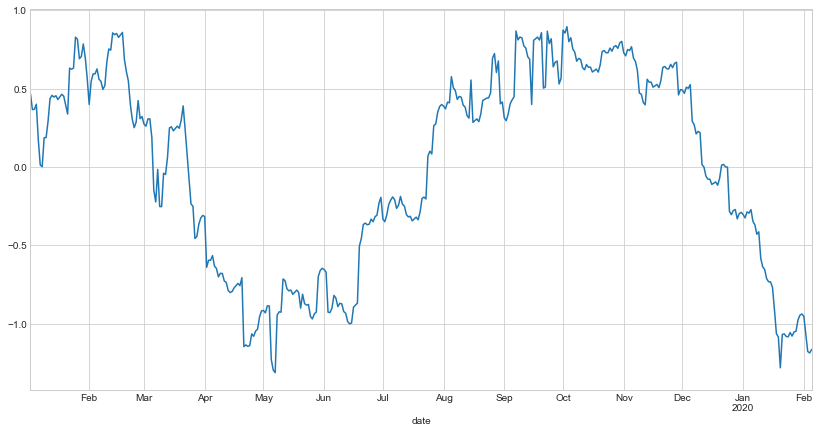

In [40]:
residual = train_st.resid
residual.plot(figsize = (14,7))

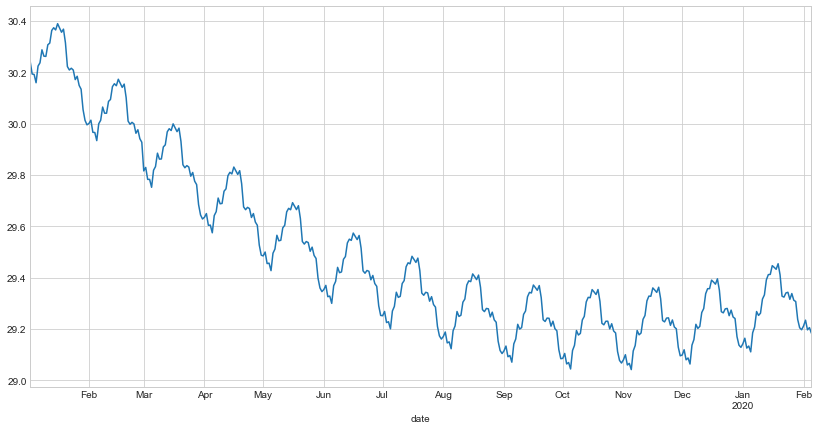

In [41]:
trend_train1 = train_st.predict(s_train)
trend_train1.plot(figsize = (14,7))

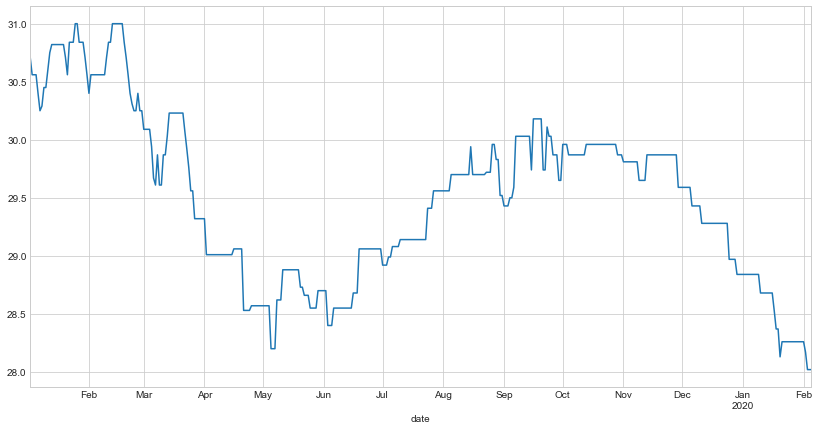

In [42]:
res_trend = residual + trend_train1
res_trend.plot(figsize = (14,7))

### Fitting residual with ARMA model

In [43]:
for p in range (1,3):
    for q in range (0,3):
        res_model = ARIMA(residual, order=(p,0,q),freq='D').fit()
        print(f'ARIMA({p},0,{q}): AIC = {res_model.aic}')

ARIMA(1,0,0): AIC = -702.5770352858854
ARIMA(1,0,1): AIC = -700.5886956534987
ARIMA(1,0,2): AIC = -698.6716249280682
ARIMA(2,0,0): AIC = -700.5883604784428
ARIMA(2,0,1): AIC = -698.5921355518421
ARIMA(2,0,2): AIC = -697.8325386163533


In [44]:
res_model = ARIMA(residual, order=(1,0,0),freq='D').fit()
res_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:                     ARMA(1, 0)   Log Likelihood                 354.289
Method:                       css-mle   S.D. of innovations              0.099
Date:                Tue, 21 Jul 2020   AIC                           -702.577
Time:                        15:33:20   BIC                           -690.603
Sample:                    01-02-2019   HQIC                          -697.835
                         - 02-05-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1115      0.394     -0.283      0.777      -0.884       0.661
ar.L1.y        0.9895      0.007    142.979      0.000       0.976       1.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0106           +0.0000j            1.0106            0.0000
-----------------------------------------------------------------------------
"""

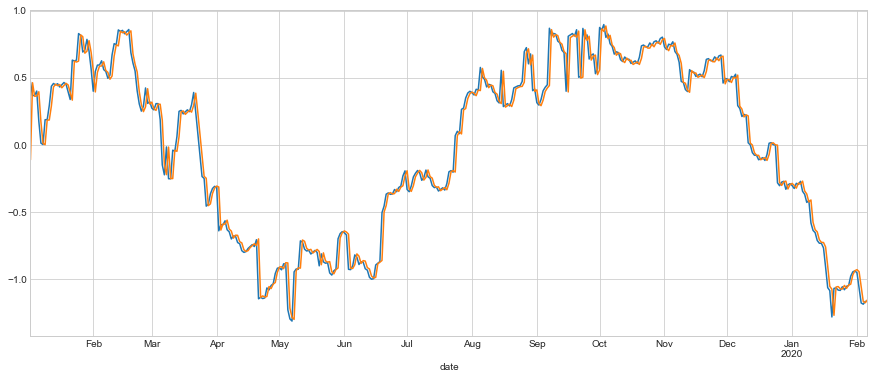

In [45]:
residual.plot(figsize=(15,6))
predict=res_model.predict(start=0,end=400)
predict.plot()
plt.show()

### Predict results

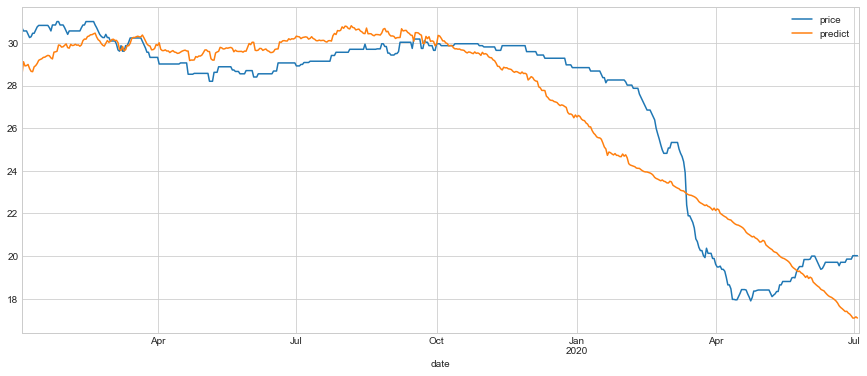

In [46]:
pre_res = res_model.predict(start=0,end=549)
y_pred = trend_price + pre_res

price.plot(figsize=(15,6),label='actual')
y_pred.plot(label='predict')

plt.legend()
plt.show()

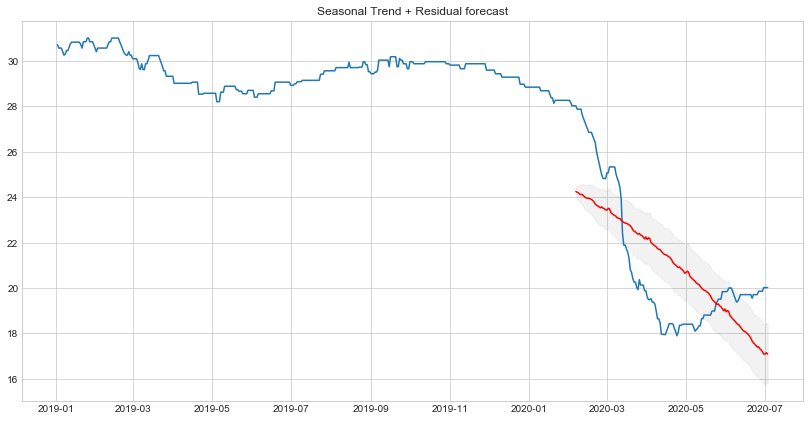

In [47]:
forecast, stderr, confint = res_model.forecast(549-400)
date_fc = test.index
fc_withtrend = forecast + trend_test

# Plotting forecast
fitted_series = pd.Series(fc_withtrend, index = date_fc)

#confidence interval
lower_series = pd.Series(confint[:, 0] + trend_test, index=date_fc)
upper_series = pd.Series(confint[:, 1] + trend_test, index=date_fc)

# Plot
fig,ax=plt.subplots(figsize=(14,7))
plt.plot(price)

plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05)

plt.title("Seasonal Trend + Residual forecast")
plt.show()

In [48]:
def _measure_metric(y, yhat):
    e = y-yhat
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape=np.abs(np.mean(e/y))
    return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test.values[0], fitted)
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

Mean Square Error: 892877.1612579066
Root Mean Square Error: 944.9217752057081
Mean Absolute Error: 828.4052116831477
Mean Absolute Percentage Error: <class 'map'>


## Using ARIMA model

In [49]:
cost_price = pd.read_excel('MPHG_suvo_quantity.xlsx', sheet_name='cost_price')
cost_price.head()

,std_commodity,std_incoterms,std_size,std_value_usd_lb,std_value_usd_kg,std_active_date
0,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-08
1,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-09
2,BT CPTO,FOB HCM,8/12,13.82,30.47,2018-06-10
3,BT CPTO,FOB HCM,8/12,13.75,30.31,2018-06-12
4,BT CPTO,FOB HCM,8/12,13.68,30.16,2018-06-14


In [50]:
cost_price= cost_price[['std_active_date','std_value_usd_kg']]
cost_price.columns = ['date','price'] 

In [51]:
cost_price = cost_price[cost_price['date'] > '2018-12-31']

In [52]:
date = pd.DataFrame(pd.date_range('2019-01-02', '2020-07-03'))
date.columns=['date']

In [53]:
price = cost_price.merge(date, how='right').sort_values(by=['date'])
price.head()

,date,price
0,2019-01-02,30.71
300,2019-01-03,NaN
301,2019-01-04,NaN
1,2019-01-05,30.56
2,2019-01-06,30.40


In [54]:
price['price'] = price['price'].fillna(method='ffill')

In [55]:
price = price.set_index('date')

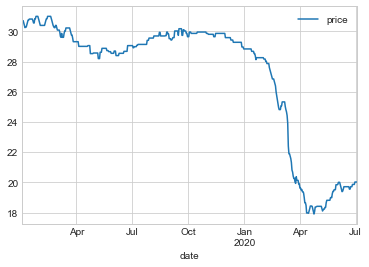

In [56]:
price.plot()

**Transform**

In [57]:
log_p = np.log(price)

In [58]:
log_p_dif = log_p.diff().dropna()

In [59]:
stationary1 = adfuller(log_p_dif, regression='nc')
print(f'ADF Statistic: {stationary1[0]}')
print(f'p-value: {stationary1[1]}')

ADF Statistic: -9.24669690946859
p-value: 4.767227191579027e-16


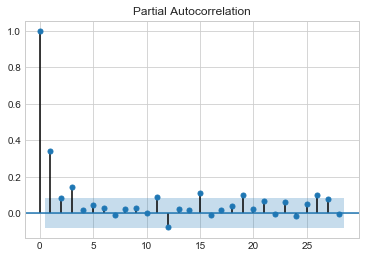

In [60]:
plot_pacf(log_p_dif)
plt.show()

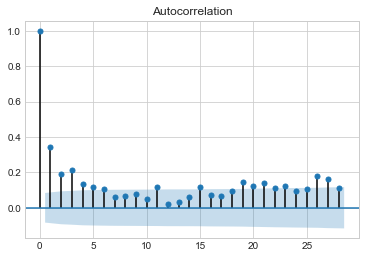

In [61]:
plot_acf(log_p_dif)
plt.show()

In [62]:
train, test = log_p.iloc[:430], log_p.iloc[430:]

In [63]:
model_sarima1 = SARIMAX(train, order=(0,1,1), seasonal_order=(1,1,2,30)).fit()
print(model_sarima1.summary())

C:\Users\Linh_Pham\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Linh_Pham\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                                   price   No. Observations:                  430
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 30)   Log Likelihood                1636.648
Date:                                 Tue, 21 Jul 2020   AIC                          -3263.296
Time:                                         15:35:38   BIC                          -3243.351
Sample:                                     01-02-2019   HQIC                         -3255.397
                                          - 03-06-2020                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1492      0.045      3.296      0.001       0.060       0

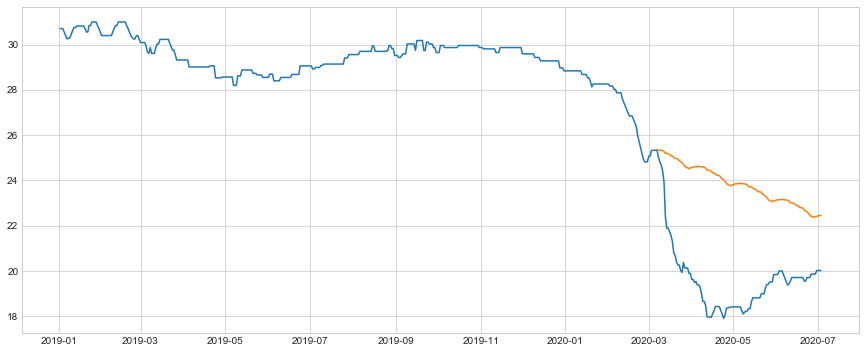

In [64]:
fitted = model_sarima1.forecast(119)
fitted_series = np.exp(fitted)

plt.figure(figsize=(15,6))
plt.plot(price)
plt.plot(fitted_series)

**Auto ARIMA**

In [65]:
model_sarima2 = pm.auto_arima(
    train, start_p=0, start_q=0,
    test='adf',
    max_p=3, max_q=4, m=30,
    start_P=0, start_Q=0,seasonal=True,
    d=1, D=1, trace=True,
    error_action='ignore',
    suppress_warnings=True, 
    stepwise=True
)

model_sarima2.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,1,0,30) [intercept=True]; AIC=-3114.541, BIC=-3106.563, Time=0.771 seconds
Fit ARIMA(1,1,0)x(1,1,0,30) [intercept=True]; AIC=-3190.324, BIC=-3174.368, Time=5.543 seconds
Fit ARIMA(0,1,1)x(0,1,1,30) [intercept=True]; AIC=-3257.880, BIC=-3241.924, Time=12.105 seconds
Fit ARIMA(0,1,0)x(0,1,0,30) [intercept=False]; AIC=-3115.667, BIC=-3111.678, Time=1.616 seconds
Fit ARIMA(0,1,1)x(0,1,0,30) [intercept=True]; AIC=-3113.116, BIC=-3101.149, Time=4.006 seconds
Fit ARIMA(0,1,1)x(1,1,1,30) [intercept=True]; AIC=-3240.488, BIC=-3220.543, Time=18.096 seconds
Fit ARIMA(0,1,1)x(0,1,2,30) [intercept=True]; AIC=-3249.989, BIC=-3230.044, Time=36.998 seconds
Fit ARIMA(0,1,1)x(1,1,0,30) [intercept=True]; AIC=-3190.358, BIC=-3174.402, Time=10.974 seconds
Fit ARIMA(0,1,1)x(1,1,2,30) [intercept=True]; AIC=-3262.117, BIC=-3238.184, Time=134.427 seconds
Near non-invertible roots for order (0, 1, 1)(1, 1, 2, 30); setting score to inf (at least one 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  430
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 30)   Log Likelihood                1637.059
Date:                                 Tue, 21 Jul 2020   AIC                          -3262.117
Time:                                         15:46:39   BIC                          -3238.184
Sample:                                              0   HQIC                         -3252.638
                                                 - 430                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.000     -0.758      0.448      -0.001       0.000
ma.L1          0.1452      0.047      3.069      0.002       0.052       0.238
ar.S.L30      -0.4477      1.302     -0.344      0.731      -3.000       2.104
ma.S.L30      -0.2864      1.305     -0.219      0.826      -2.844       2.271
ma.S.L60      -0.3687      0.958     -0.385      0.700      -2.246       1.508
sigma2      1.497e-05   7.84e-07     19.089      0.000    1.34e-05    1.65e-05
===================================================================================
Ljung-Box (Q):                       58.82   Jarque-Bera (JB):               265.19
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.06
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

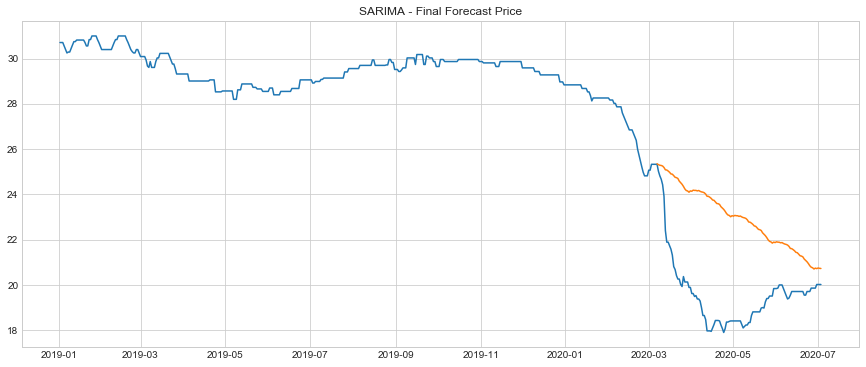

In [66]:
n_periods = 119
fitted, confint = model_sarima2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

# make series for plotting purpose
fitted_series = pd.Series(np.exp(fitted), index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig,ax=plt.subplots(figsize=(15,6))

plt.plot(price)
plt.plot(fitted_series)


plt.title("SARIMA - Final Forecast Price")

plt.show()

In [67]:
def _measure_metric(y, yhat):
    e = y-yhat
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape=np.abs(np.mean(e/y))
    return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test.values[0], fitted)
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

Mean Square Error: 0.013287284526641843
Root Mean Square Error: 0.11527048419539948
Mean Absolute Error: 0.09931985221688902
Mean Absolute Percentage Error: 0.030725270024679993
